In [1]:
import numpy as np
import random
import pandas as pd
import re

In [2]:
!pip install tensorflow
!pip install keras

  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow-datasets



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow as tf

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
!pip install wordcloud
!pip install plotly



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import tensorflow as tf

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
import pandas as pd

# Read the CSV file
csv_file_path = 'C:\\Users\\Asus\\Desktop\\text Embedding Sentiment analyzer\\training.1600000.processed.noemoticon.csv'
data = pd.read_csv(csv_file_path, header=None, engine='python', encoding='latin1')
data.columns = ['Sentiment', 'Id', 'Date', 'Query', 'User', 'Text']

# Specify the correct file path for the stopwords file inside the directory
stopwords_file_path = 'C:\\Users\\Asus\\Desktop\\text Embedding Sentiment analyzer\\stopword-manual\\stopwords.txt'

# Read the stopwords file
stopwords_man = pd.read_csv(stopwords_file_path, delimiter='\t', header=None)[0].values

# Rest of your code...
train_data = data.iloc[:, -1].values
train_label = data.iloc[:, 0].values


In [12]:
stemmer=SnowballStemmer('english')

In [13]:
data['Sentiment'].value_counts()

Sentiment
0    800000
4    800000
Name: count, dtype: int64

In [14]:
print("A few negative comments")
data.head(20)

A few negative comments


,Sentiment,Id,Date,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [15]:
print("A few positive comments")
data.tail(20)

A few positive comments


,Sentiment,Id,Date,Query,User,Text
1599980,4,2193578679,Tue Jun 16 08:38:56 PDT 2009,NO_QUERY,puchal_ek,@myheartandmind jo jen by nemuselo zrovna tÃ© ...
1599981,4,2193578716,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,youtubelatest,Another Commenting Contest! [;: Yay!!! http:/...
1599982,4,2193578739,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,Mandi_Davenport,@thrillmesoon i figured out how to see my twee...
1599983,4,2193578758,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,xoAurixo,"@oxhot theri tomorrow, drinking coffee, talkin..."
1599984,4,2193578847,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,RobFoxKerr,You heard it here first -- We're having a girl...
1599985,4,2193578982,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,LISKFEST,"if ur the lead singer in a band, beware fallin..."
1599986,4,2193579087,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,marhgil,@tarayqueen too much ads on my blog.
1599987,4,2193579092,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,cathriiin,@La_r_a NEVEER I think that you both will get...
1599988,4,2193579191,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,tellman,@Roy_Everitt ha- good job. that's right - we g...
1599989,4,2193579211,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,jazzstixx,@Ms_Hip_Hop im glad ur doing well


In [16]:
def tweet_clean(tweet):
    tweet=re.sub(r'@[A-Za-z0-9]+'," ",tweet) ##Removing the usernames
    tweet=re.sub(r'^[A-Za-z0-9.!?]+'," ",tweet) ##Removing digits and punctuations
    tweet=re.sub(r'https?://[A-Za-z0-9./]+'," ",tweet) ## removing links
    tweet=re.sub(r' +'," ",tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\'s", " ", tweet)
    tweet = re.sub(r"\'ve", " have ", tweet)
    tweet = re.sub(r"can't", "cannot ", tweet)
    tweet = re.sub(r"n't", " not ", tweet)
    tweet = re.sub(r"\'d", " would ", tweet)
    tweet = re.sub(r"\'ll", " will ", tweet)
    tweet = re.sub(r"\'scuse", " excuse ", tweet)
    tweet = tweet.strip(' ')
    tweet = tweet.strip('. .')
    tweet = tweet.replace('.',' ')
    tweet = tweet.replace('-',' ')
    tweet = tweet.replace("’", "'").replace("′", "'").replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")
    tweet = tweet.replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")
    tweet = tweet.replace("€", " euro ").replace("'ll", " will")
    tweet = tweet.replace("don't", "do not").replace("didn't", "did not").replace("im","i am").replace("it's", "it is")
    tweet = tweet.replace(",000,000", "m").replace("n't", " not").replace("what's", "what is")
    tweet = tweet.replace(",000", "k").replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")
    tweet = tweet.replace("he's", "he is").replace("she's", "she is").replace("'s", " own")
    tweet = re.sub('\s+', ' ', tweet)
    tweet=tweet.split()
    tweet=[stemmer.stem(word) for word in tweet if word not in stopwords_man]
    tweet=' '.join(word for word in tweet)

    #all_stopwords = stopwords.words('english')
    return tweet.lower()

tweets_clean=[tweet_clean(tweet) for tweet in train_data]

In [17]:
data['Text_clean']=tweets_clean
data['No_of_Words']=[len(text.split()) for text in data['Text_clean']]

In [18]:
train_label[train_label==4]=1  ##Resetting the labels for positive tweets to 1

In [19]:
negatives=data['Sentiment']==0
positives=data['Sentiment']==1

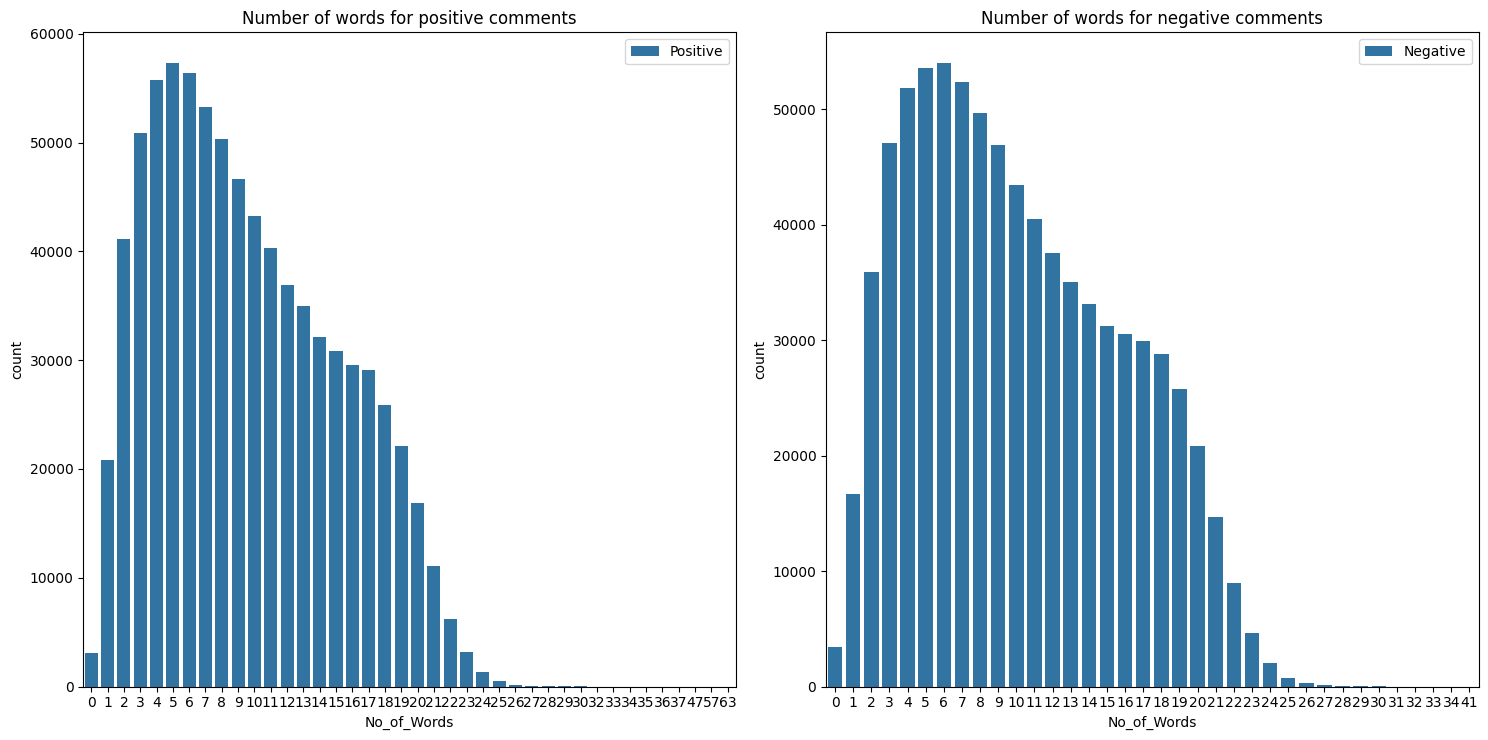

In [20]:
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))

sns.countplot(x=data[positives]['No_of_Words'],label='Positive',ax=ax[0])
sns.countplot(x=data[negatives]['No_of_Words'],label='Negative',ax=ax[1])
ax[0].set_title('Number of words for positive comments')
ax[1].set_title('Number of words for negative comments')
plt.tight_layout()
plt.show()

In [21]:
data['User'].value_counts().head(20) #Top 20 tweeters


User
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
SongoftheOss       227
Jayme1988          225
keza34             219
ramdomthoughts     216
shanajaca          213
wowlew             212
nuttychris         211
TraceyHewins       211
thisgoeshere       207
Spidersamm         205
Name: count, dtype: int64

In [22]:
data['Words'] = data['Text_clean'].apply(lambda x:str(x).split())

top_pos = Counter([word for text in data[positives]['Words'] for word in text])
top_pos_df=pd.DataFrame(top_pos.most_common(100),columns=['Words','Counts'])

top_neg = Counter([word for text in data[negatives]['Words'] for word in text])
top_neg_df=pd.DataFrame(top_neg.most_common(100),columns=['Words','Counts'])

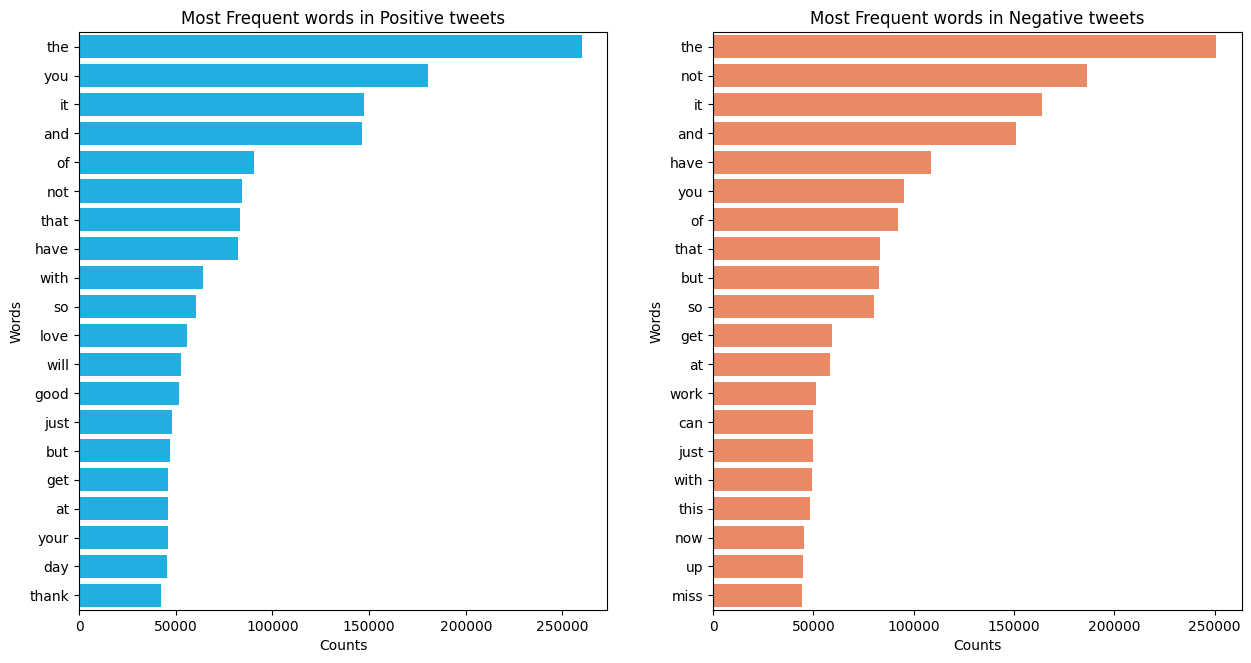

In [23]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))
sns.barplot(y='Words',x='Counts',data=top_pos_df[:20],color='deepskyblue',ax=ax[0])
sns.barplot(y='Words',x='Counts',data=top_neg_df[:20],color='coral',ax=ax[1])
ax[0].set_title("Most Frequent words in Positive tweets")
ax[1].set_title("Most Frequent words in Negative tweets")
plt.show()

In [25]:
!pip install nbformat --upgrade


                                              0.0/77.6 kB ? eta -:--:--
     ---------------------------------------- 77.6/77.6 kB 1.4 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\jupyter-trust.exe' -> 'C:\\Python311\\Scripts\\jupyter-trust.exe.deleteme'


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
!pip install plotly --upgrade



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip uninstall jupyter
!pip install jupyter


                                              0.0/4.0 MB ? eta -:--:--
                                              0.1/4.0 MB 1.3 MB/s eta 0:00:04
     --                                       0.3/4.0 MB 3.5 MB/s eta 0:00:02
     ------                                   0.6/4.0 MB 4.4 MB/s eta 0:00:01
     -----------                              1.2/4.0 MB 6.2 MB/s eta 0:00:01
     ------------------------                 2.5/4.0 MB 11.3 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 15.1 MB/s eta 0:00:00
                                              0.0/123.4 kB ? eta -:--:--
     ---------------------------------------- 123.4/123.4 kB ? eta 0:00:00
                                              0.0/256.4 kB ? eta -:--:--
     ------------------------------------- 256.4/256.4 kB 16.4 MB/s eta 0:00:00
                                              0.0/139.4 kB ? eta -:--:--
     ---------------------------------------- 139.4/139.4 kB ? eta 0:00:00
          

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\pyjson5.exe' -> 'C:\\Python311\\Scripts\\pyjson5.exe.deleteme'


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
!pip install notebook --upgrade


  Using cached notebook-7.0.7-py3-none-any.whl (4.0 MB)
  Using cached jupyter_server-2.12.5-py3-none-any.whl (380 kB)
  Using cached jupyterlab_server-2.25.2-py3-none-any.whl (58 kB)
  Using cached jupyterlab-4.0.12-py3-none-any.whl (9.2 MB)
  Using cached notebook_shim-0.2.3-py3-none-any.whl (13 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl (15 kB)
  Using cached jupyter_events-0.9.0-py3-none-any.whl (18 kB)
  Using cached jupyter_server_terminals-0.5.2-py3-none-any.whl (13 kB)
  Using cached nbconvert-7.14.2-py3-none-any.whl (256 kB)
  Using cached overrides-7.7.0-py3-none-any.whl (17 kB)
  Using cached prometheus_client-0.19.0-py3-none-any.whl (54 kB)
  Using cached pywinpty-2.0.12-cp311-none-win_amd64.whl (1.4 MB)
  Using cached Send2Trash-1.8.2-py3-none-any.whl (18 kB)
  Using cached terminado-0.18.0-py3-none-any.whl (14 kB)
  Using cached websocket_client-1.7.0-py3-none-any.whl (58 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl (6.1 kB)
  Using cached jupyter_lsp-2

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\wsdump.exe' -> 'C:\\Python311\\Scripts\\wsdump.exe.deleteme'


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!pip install nbformat==4.2.0


                                              0.0/153.3 kB ? eta -:--:--
     ---------------                         61.4/153.3 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2
  Rolling back uninstall of nbformat
  Moving to c:\python311\lib\site-packages\nbformat-5.9.2.dist-info\
   from C:\Python311\Lib\site-packages\~bformat-5.9.2.dist-info
  Moving to c:\python311\lib\site-packages\nbformat\
   from C:\Python311\Lib\site-packages\~bformat


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\jupyter-trust.exe' -> 'C:\\Python311\\Scripts\\jupyter-trust.exe.deleteme'


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
!pip install --upgrade --force-reinstall jupyter


  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached notebook-7.0.7-py3-none-any.whl (4.0 MB)
  Using cached qtconsole-5.5.1-py3-none-any.whl (123 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl (24 kB)
  Using cached nbconvert-7.14.2-py3-none-any.whl (256 kB)
                                              0.0/116.1 kB ? eta -:--:--
     -------------                         41.0/116.1 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 116.1/116.1 kB 2.3 MB/s eta 0:00:00
  Using cached ipywidgets-8.1.1-py3-none-any.whl (139 kB)
                                              0.0/4.9 MB ? eta -:--:--
     --                                       0.3/4.9 MB 5.2 MB/s eta 0:00:01
     -----                                    0.7/4.9 MB 7.0 MB/s eta 0:00:01
     ---------                                1.2/4.9 MB 8.4 MB/s eta 0:00:01
     ------------------------                 3.0/4.9 MB 15.7 MB/s eta 0:00:01
     ----------------------------

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python311\\Scripts\\pywin32_postinstall.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import plotly.express as px
from plotly.offline import plot

# Assuming top_pos_df is your DataFrame containing data for the treemap
fig = px.treemap(top_pos_df, path=['Words'], values='Counts', title='Most Common Words in Positive Tweets')

# Use plot function to display the figure
plot(fig)



'temp-plot.html'

In [42]:
import plotly.express as px
from plotly.offline import plot

# Assuming top_pos_df is your DataFrame containing data for the treemap
fig = px.treemap(top_pos_df, path=['Words'], values='Counts', title='Most Common Words in Positive Tweets')

# Save the figure as an HTML file
plot(fig, filename='treemap.html')


'treemap.html'

In [44]:
def word_cloud(array,add_stopwords):
    texts=' '.join(text for text in array)
    stopwords = set(STOPWORDS)
    stopwords = stopwords.union(add_stopwords)
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(texts)


    plt.figure(figsize = (15, 7.5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()
    #return texts
stp = {'ti', "ame","amp","quot","lol"}

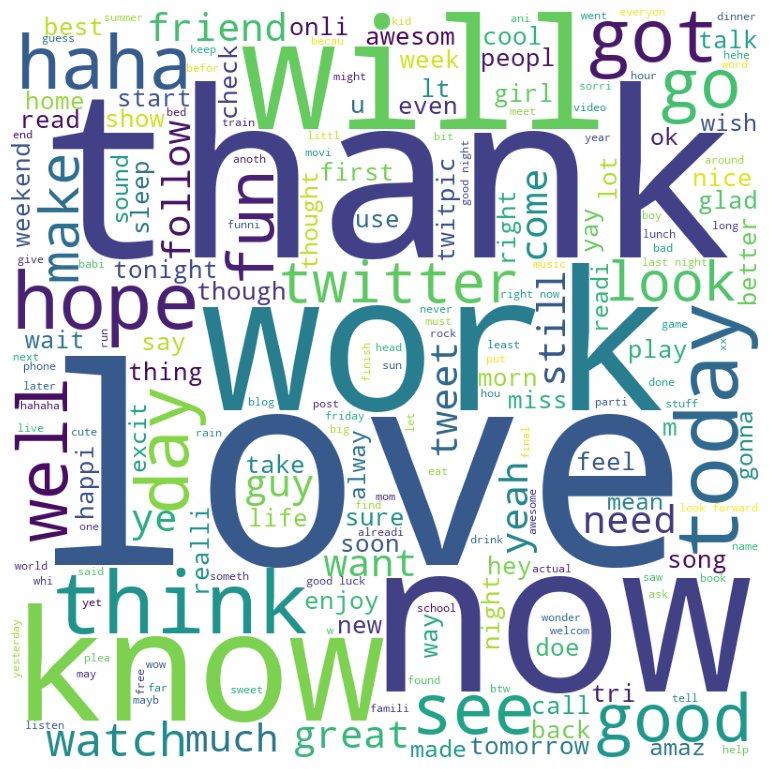

In [45]:
word_cloud(data[positives]['Text_clean'],stp)

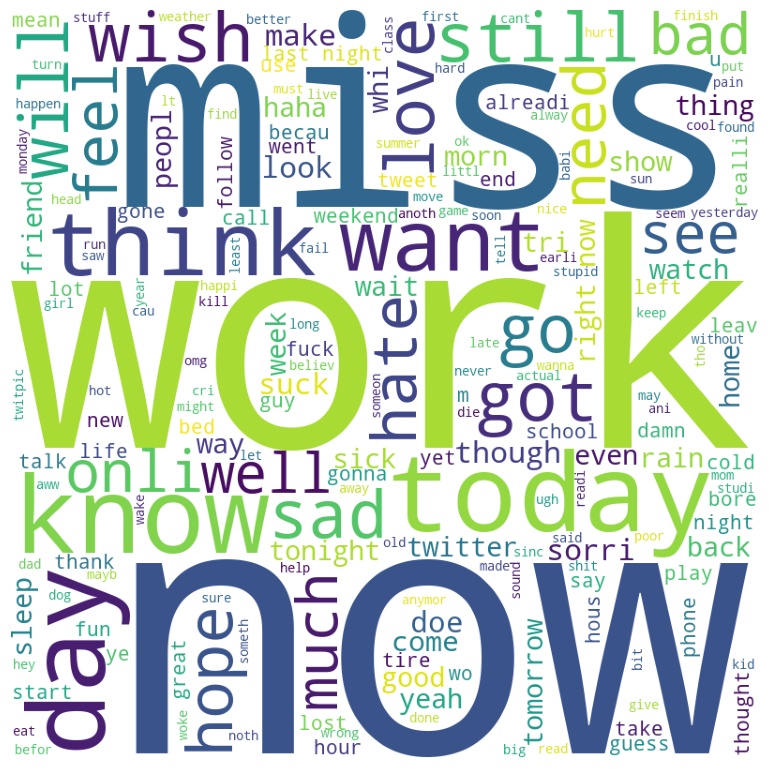

In [46]:
word_cloud(data[negatives]['Text_clean'],stp)

In [52]:
import tensorflow_datasets as tfds

# Assuming tweets_clean is your list of cleaned tweets
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    tweets_clean, target_vocab_size=2**16
)
tokenizer.save_to_file('tokenizer_tweets')  # Save our tokenizer to use later
data_inputs = [tokenizer.encode(sentence) for sentence in tweets_clean]


In [53]:
### Defining a constant size for each array and Padding the shorter ones

Max_len=np.max([len(sentence) for sentence in data_inputs])

### Padding with 0s at the end of the sentences since 0 has no value and it wouldn't change the meaning of our sentence
data_inputs=tf.keras.preprocessing.sequence.pad_sequences(data_inputs,value=0,padding='post',maxlen=Max_len)

In [54]:
idx=np.random.randint(0,800000,8000)
test_idx=np.concatenate((idx,idx+800000))

X_test=data_inputs[test_idx]
y_test=train_label[test_idx]

X_test=data_inputs[test_idx]
y_test=train_label[test_idx]
X_train=np.delete(data_inputs,test_idx,axis=0)
y_train=np.delete(train_label,test_idx,axis=0)

In [57]:
class DCNN(tf.keras.Model):

    def __init__(self,
                 vocab_size,
                 emb_dim=128,
                 nb_filters=50,
                 FFN_units=256,
                 nb_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name='dcnn'):
        super(DCNN,self).__init__(name=name)

        self.embeddings=layers.Embedding(vocab_size,emb_dim)

        self.bigram=layers.Conv1D(filters=nb_filters,kernel_size=2,
                                  padding='valid',activation='relu')

        self.trigram=layers.Conv1D(filters=nb_filters,kernel_size=3,
                                  padding='valid',activation='relu')

        self.fourgram=layers.Conv1D(filters=nb_filters,kernel_size=4,
                                  padding='valid',activation='relu')   

        self.pooling=layers.GlobalMaxPool1D()

        self.dense_1=layers.Dense(units=FFN_units,activation='relu')
        self.dropout=layers.Dropout(rate=dropout_rate)

        if nb_classes==2:
            self.dense_2=layers.Dense(units=1,activation='sigmoid')
        else:
            self.dense_2=layers.Dense(units=nb_classes,activation='softmax')  

    def call(self,inputs,training):
        x=self.embeddings(inputs)
        x_1=self.bigram(x)
        x_1=self.pooling(x_1)
        x_2=self.trigram(x)
        x_2=self.pooling(x_2)
        x_3=self.bigram(x)
        x_3=self.pooling(x_3)

        merged=tf.concat([x_1,x_2,x_3],axis=-1)
        merged=self.dense_1(merged)
        merged=self.dropout(merged,training)
        output=self.dense_2(merged)

        return output

In [58]:
VOCAB_SIZE = tokenizer.vocab_size

EMB_DIM = 200
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = 2 #len(set(train_labels))

DROPOUT_RATE = 0.2

BATCH_SIZE = 32
NB_EPOCHS = 1

In [59]:
Dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters=NB_FILTERS,
            FFN_units=FFN_UNITS,
            nb_classes=NB_CLASSES,
            dropout_rate=DROPOUT_RATE)

if NB_CLASSES == 2:
    Dcnn.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
else:
    Dcnn.compile(loss="sparse_categorical_crossentropy",
                 optimizer="adam",
                 metrics=["sparse_categorical_accuracy"])

In [60]:
###Saving Checkpoints    
    
checkpoint_path = "/kaggle/working/ckpt/"

ckpt = tf.train.Checkpoint(Dcnn=Dcnn)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Latest checkpoint restored!!")        

In [62]:
Dcnn.fit(X_train,
         y_train,
         batch_size=BATCH_SIZE,
         epochs=NB_EPOCHS)

 2747/49503 [>.............................] - ETA: 1:43:25 - loss: 0.4654 - accuracy: 0.7790

KeyboardInterrupt: 

In [63]:
ckpt_manager.save()  ##Saving our Checkpoints
Dcnn.save('Tweet_sentiment')

INFO:tensorflow:Assets written to: Tweet_sentiment\assets


INFO:tensorflow:Assets written to: Tweet_sentiment\assets


In [64]:
results=Dcnn.evaluate(X_test,y_test,batch_size=BATCH_SIZE)
print(results)

500/500 [==============================] - 4s 7ms/step - loss: 0.4610 - accuracy: 0.7804
[0.4610062837600708, 0.7804375290870667]
